In [ ]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sonic_screwdrivers import ROCCurveVisualizer

In [3]:
RCV = ROCCurveVisualizer()

In [4]:
# Generate random  uniform samples between 0 and 1 to represent the probabilities
probs = np.random.uniform(0, 1, 100)

In [5]:
# Generate random data to represent the labels
Y = pd.DataFrame([True if x > 0.5 and np.random.uniform(0, 1, 1) > 0.5 else False for x in probs])

In [6]:
# Calculate ROC and AUC information
RCV.calculate_roc(probs, Y)

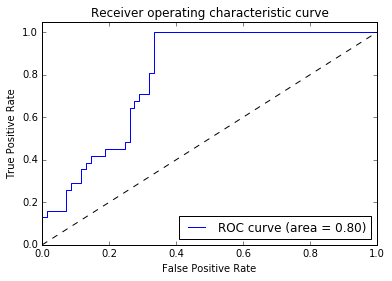

In [7]:
# Create an ROC Curve based on the ROC data
RCV.create_roc_curve_plot()

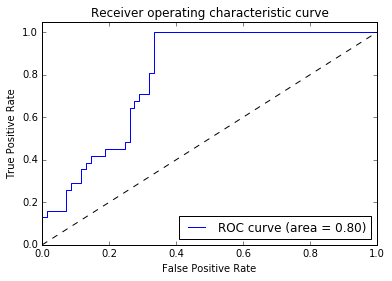

In [8]:
# You can also just use the combined calculate_and_plot method to do this all in one step.
# you can also use a pandas Series
RCV.calculate_and_plot(probs, Y.iloc[:, 0])

Check that Exceptions are handled
===

### Handle Nans!


In [9]:
Y.iloc[0] = None

In [10]:
RCV.calculate_roc(probs, Y)

SonicScrewdriverError: Y contains NaNs.

In [11]:
Y.iloc[0] = 0

In [12]:
probs[0] = None

In [13]:
RCV.calculate_roc(probs, Y)

SonicScrewdriverError: The probabilities contains NaNs.

In [14]:
probs[0] = 0

### Handle mismatched sizes

In [15]:
probs = np.append(0, probs)

In [16]:
RCV.calculate_roc(probs, Y)

SonicScrewdriverError: The probabilities and Y must be the same size.

### Handle multiple columns

In [17]:
probs = np.random.uniform(0, 1, 100)

In [18]:
Y = pd.DataFrame([[True if x > 0.5 else False for x in np.random.uniform(0, 1, 100)], range(0, 100)]).T

In [19]:
RCV.calculate_roc(probs, Y)

SonicScrewdriverError: Y must be a one-column DataFrame or Series.

In [20]:
RCV.calculate_roc(probs, Y.iloc[:, 0])

### Check probs are between 0 and 1

In [21]:
Y = pd.DataFrame([True if x > 0.5 else False for x in np.random.uniform(0, 1, 100)])

In [22]:
probs = np.random.uniform(0, 2, 100)

In [23]:
RCV.calculate_and_plot(probs, Y)

SonicScrewdriverError: The probabilities must be between 0 and 1.

In [24]:
probs = np.random.uniform(-1, 1, 100)

In [25]:
RCV.calculate_and_plot(probs, Y)

SonicScrewdriverError: The probabilities must be between 0 and 1.

### Call methods in correct order

In [26]:
probs = np.random.uniform(0, 1, 100)

In [27]:
Y = pd.DataFrame([True if x > 0.5 else False for x in np.random.uniform(0, 1, 100)])

In [28]:
RCV = ROCCurveVisualizer()

In [29]:
RCV.create_roc_curve_plot()

NotFittedError: Call calculate_roc before create_roc_curve_plot

### Test if probabilities is 1d

In [50]:
probs = np.random.rand(-1, 1, 100, 2)

ValueError: negative dimensions are not allowed

In [42]:
test

array([[0, 1],
       [0, 1]])

In [43]:
test.shape

(2, 2)

In [45]:
test2 = np.array([ 1,1])

In [46]:
test2.shape

(2,)

In [47]:
test2.ndim

1

In [48]:
test.ndim

2